In [16]:
import time
import pandas

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

from ipynb.fs.full.ga_algorithm import *
from ipynb.fs.full.ga_nonogram import getInfo

from ipynb.fs.full.bf_nonogram import Puzzle

In [2]:
inputs = [
    [
        {
            "rows": [[6], [4, 3], [5, 4], [2, 3, 2], [3, 5], [5], [3], [2], [1, 2, 1], [10]],
            "cols": [[3, 1], [5, 2], [3, 2, 1], [4, 1, 1], [10], [1, 7], [3, 1, 1, 1], [3, 1, 1], [4, 1], [2, 2]],
            "n": 500,
            "m_indpb": 0.5
        },
        {
            "rows": [[6], [4, 3], [5, 4], [2, 3, 2], [3, 5], [5], [3], [2], [1, 2, 1], [10]],
            "cols": [[3, 1], [5, 2], [3, 2, 1], [4, 1, 1], [10], [1, 7], [3, 1, 1, 1], [3, 1, 1], [4, 1], [2, 2]],
            "n": 1000,
            "m_indpb": 0.3
        },
        {
            "rows": [[6], [4, 3], [5, 4], [2, 3, 2], [3, 5], [5], [3], [2], [1, 2, 1], [10]],
            "cols": [[3, 1], [5, 2], [3, 2, 1], [4, 1, 1], [10], [1, 7], [3, 1, 1, 1], [3, 1, 1], [4, 1], [2, 2]],
            "n": 1500,
            "m_indpb": 0.1
        }
    ],
    [
        {
            "rows": [[3], [3], [1, 1], [2, 1], [3], [2, 7], [5, 4, 1], [1, 2, 1], [1, 7], [3, 2], [4, 1, 6], [6, 1, 3], [13], [8], [4]],
            "cols": [[1, 3], [1, 3], [1, 3], [1, 3], [4, 2], [3, 4], [5, 1, 2], [2, 2, 1, 2], [4, 1, 8], [4, 1, 3], [2, 1, 1, 3], [2, 1, 5], [2, 1, 4], [1, 4], [4]],
            "n": 10000,
            "m_indpb": 0.5
        },
        {
            "rows": [[3], [3], [1, 1], [2, 1], [3], [2, 7], [5, 4, 1], [1, 2, 1], [1, 7], [3, 2], [4, 1, 6], [6, 1, 3], [13], [8], [4]],
            "cols": [[1, 3], [1, 3], [1, 3], [1, 3], [4, 2], [3, 4], [5, 1, 2], [2, 2, 1, 2], [4, 1, 8], [4, 1, 3], [2, 1, 1, 3], [2, 1, 5], [2, 1, 4], [1, 4], [4]],
            "n": 15000,
            "m_indpb": 0.3
        },
        {
            "rows": [[3], [3], [1, 1], [2, 1], [3], [2, 7], [5, 4, 1], [1, 2, 1], [1, 7], [3, 2], [4, 1, 6], [6, 1, 3], [13], [8], [4]],
            "cols": [[1, 3], [1, 3], [1, 3], [1, 3], [4, 2], [3, 4], [5, 1, 2], [2, 2, 1, 2], [4, 1, 8], [4, 1, 3], [2, 1, 1, 3], [2, 1, 5], [2, 1, 4], [1, 4], [4]],
            "n": 20000,
            "m_indpb": 0.1
        }
    ],
    [
        {
            "rows": [[4, 5], [3, 1, 1], [3, 2, 2], [2, 1, 1, 2, 1], [2, 1, 3, 1], [2, 1, 1, 1, 3], [3, 2, 2], [2, 1, 7, 2], [1, 4, 5, 4], [3, 1, 3, 3], [2, 2, 2, 2], [2, 1, 2, 2, 3], [3, 3, 3, 1], [7, 1, 2, 1], [4, 6, 2, 2], [6, 2, 1, 1], [2, 8, 5], [3, 4, 3], [6], [3]],
            "cols": [[4], [5], [2, 3], [5, 2, 2], [3, 4, 3, 2], [3, 2, 2, 2, 1], [2, 1, 1, 5, 1], [2, 1, 3, 2, 2], [2, 2, 3, 2], [7, 6, 2], [2, 12], [1, 3, 4], [1, 2], [2, 2, 2], [3, 2, 1, 3], [1, 2, 1, 2, 2], [1, 2, 2, 2, 2], [1, 3, 2, 3, 2], [3, 7, 3], [13]],
            "n": 20000,
            "m_indpb": 0.5
        },
        {
            "rows": [[4, 5], [3, 1, 1], [3, 2, 2], [2, 1, 1, 2, 1], [2, 1, 3, 1], [2, 1, 1, 1, 3], [3, 2, 2], [2, 1, 7, 2], [1, 4, 5, 4], [3, 1, 3, 3], [2, 2, 2, 2], [2, 1, 2, 2, 3], [3, 3, 3, 1], [7, 1, 2, 1], [4, 6, 2, 2], [6, 2, 1, 1], [2, 8, 5], [3, 4, 3], [6], [3]],
            "cols": [[4], [5], [2, 3], [5, 2, 2], [3, 4, 3, 2], [3, 2, 2, 2, 1], [2, 1, 1, 5, 1], [2, 1, 3, 2, 2], [2, 2, 3, 2], [7, 6, 2], [2, 12], [1, 3, 4], [1, 2], [2, 2, 2], [3, 2, 1, 3], [1, 2, 1, 2, 2], [1, 2, 2, 2, 2], [1, 3, 2, 3, 2], [3, 7, 3], [13]],
            "n": 25000,
            "m_indpb": 0.3
        },
        {
            "rows": [[4, 5], [3, 1, 1], [3, 2, 2], [2, 1, 1, 2, 1], [2, 1, 3, 1], [2, 1, 1, 1, 3], [3, 2, 2], [2, 1, 7, 2], [1, 4, 5, 4], [3, 1, 3, 3], [2, 2, 2, 2], [2, 1, 2, 2, 3], [3, 3, 3, 1], [7, 1, 2, 1], [4, 6, 2, 2], [6, 2, 1, 1], [2, 8, 5], [3, 4, 3], [6], [3]],
            "cols": [[4], [5], [2, 3], [5, 2, 2], [3, 4, 3, 2], [3, 2, 2, 2, 1], [2, 1, 1, 5, 1], [2, 1, 3, 2, 2], [2, 2, 3, 2], [7, 6, 2], [2, 12], [1, 3, 4], [1, 2], [2, 2, 2], [3, 2, 1, 3], [1, 2, 1, 2, 2], [1, 2, 2, 2, 2], [1, 3, 2, 3, 2], [3, 7, 3], [13]],
            "n": 30000,
            "m_indpb": 0.1
        }
    ]
]

In [3]:
results = []

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
nonogram10x10 = []

for nonogram in inputs[0]:
    
    for i in range(6):

        start = time.time()

        toolbox = base.Toolbox()
        toolbox.register("population", createIndividuals, nonogram, creator.Individual)

        toolbox.register("evaluate", evalOneMax, nonogram=nonogram)
        toolbox.register("mate", cxTwoPoints)
        toolbox.register("mutate", mutShuffleIndexes, indpb=nonogram.get("m_indpb"), nonogram=nonogram)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=nonogram.get("n"))
        hof = tools.HallOfFame(1)

        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaSimpleWithElitism(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

        end = time.time()

        rows, cols, row_blocks, col_blocks = getInfo(nonogram)

        print("\nBest individual is: %s" % hof[0])
        result = getNonogramFromIndividual(rows, col_blocks, hof[0])

        print("\nTime: ", round(end - start, 3), "sec")

        print("\nNonogram:\n")

        for row in result:
            print(''.join(map(lambda s: chr(9608) if s else ' ', row)))

        nonogram10x10.append({
            "population": nonogram.get("n"),
            "mut_indpb": nonogram.get("m_indpb"),
            "time": round(end - start, 3),
            "fitness_res": log.select("min")[-1],
            "logbook": log
        })
    
print(nonogram10x10)
    



gen	nevals	avg 	min	max
0  	500   	9.64	7  	10 
1  	303   	9.33	7  	10 
2  	310   	8.962	6  	10 
3  	311   	8.678	6  	10 
4  	293   	8.264	6  	10 
5  	322   	8.084	5  	10 
6  	284   	7.86 	5  	10 
7  	297   	7.584	5  	10 
8  	334   	7.404	4  	10 
9  	297   	7.028	3  	10 
10 	286   	6.634	3  	10 
11 	275   	5.98 	3  	10 
12 	272   	5.66 	2  	10 
13 	303   	5.368	2  	10 
14 	314   	4.992	2  	10 
15 	301   	4.672	0  	10 

Best individual is: [[2, 3], [1, 1], [0, 0, 2], [0, 0, 2], [0], [0, 1], [0, 0, 0, 1], [0, 0, 3], [1, 3], [2, 3]]

Time:  1.235 sec

Nonogram:

  ██████  
 ████ ███ 
█████ ████
██ ███  ██
███ █████ 
 █████    
    ███   
    ██    
 █  ██   █
██████████


gen	nevals	avg  	min	max
0  	500   	9.596	7  	10 
1  	285   	9.238	7  	10 
2  	293   	8.87 	6  	10 
3  	332   	8.586	6  	10 
4  	321   	8.302	4  	10 
5  	287   	7.904	4  	10 
6  	296   	7.644	4  	10 
7  	291   	7.39 	4  	10 
8  	289   	7.128	4  	10 
9  	295   	6.728	4  	10 
10 	308   	6.282	4  	10 
11 	320   	5.814	4  

22 	586   	2.857	2  	10 
23 	587   	2.833	2  	10 
24 	606   	2.942	2  	10 

Best individual is: [[2, 3], [1, 0], [0, 0, 2], [0, 0, 0], [0], [0, 1], [0, 0, 0, 1], [0, 0, 3], [1, 3], [2, 2]]

Time:  3.025 sec

Nonogram:

  ██████  
 ████ ███ 
█████ ████
██ ███  ██
███ █████ 
 █████    
    ███   
 █ ███   █
 █  ██   █
█ █ █████ 


gen	nevals	avg  	min	max
0  	1000  	9.625	6  	10 
1  	602   	9.245	6  	10 
2  	568   	8.8  	6  	10 
3  	582   	8.388	6  	10 
4  	630   	8.124	5  	10 
5  	584   	7.835	5  	10 
6  	645   	7.56 	5  	10 
7  	597   	7.33 	4  	10 
8  	601   	7.08 	4  	10 
9  	575   	6.888	4  	10 
10 	606   	6.712	4  	10 
11 	575   	6.494	4  	10 
12 	588   	6.26 	3  	10 
13 	585   	6.113	3  	10 
14 	605   	5.937	3  	10 
15 	644   	5.78 	3  	10 
16 	618   	5.479	3  	10 
17 	585   	5.073	3  	10 
18 	574   	4.775	3  	9  
19 	595   	4.446	3  	10 
20 	585   	4.195	3  	9  
21 	636   	3.88 	3  	8  
22 	588   	3.584	3  	8  
23 	626   	3.722	3  	8  

Best individual is: [[2, 3], [0, 2], [0, 0,

In [6]:
nonogram15x15 = []

for nonogram in inputs[1]:
    
    for i in range(3):

        start = time.time()

        toolbox = base.Toolbox()
        toolbox.register("population", createIndividuals, nonogram, creator.Individual)

        toolbox.register("evaluate", evalOneMax, nonogram=nonogram)
        toolbox.register("mate", cxTwoPoints)
        toolbox.register("mutate", mutShuffleIndexes, indpb=nonogram.get("m_indpb"), nonogram=nonogram)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=nonogram.get("n"))
        hof = tools.HallOfFame(1)

        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaSimpleWithElitism(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

        end = time.time()

        rows, cols, row_blocks, col_blocks = getInfo(nonogram)

        print("\nBest individual is: %s" % hof[0])
        result = getNonogramFromIndividual(rows, col_blocks, hof[0])

        print("\nTime: ", round(end - start, 3), "sec")

        print("\nNonogram:\n")

        for row in result:
            print(''.join(map(lambda s: chr(9608) if s else ' ', row)))

        nonogram15x15.append({
            "population": nonogram.get("n"),
            "mut_indpb": nonogram.get("m_indpb"),
            "time": round(end - start, 3),
            "fitness_res": log.select("min")[-1],
            "logbook": log
        })
    
print(nonogram15x15)
    



gen	nevals	avg    	min	max
0  	10000 	14.8567	12 	15 
1  	6039  	14.7249	12 	15 
2  	6006  	14.5658	12 	15 
3  	5991  	14.415 	11 	15 
4  	5858  	14.2781	11 	15 
5  	5946  	14.1623	11 	15 
6  	5938  	14.0471	11 	15 
7  	5959  	13.9233	11 	15 
8  	6037  	13.7908	10 	15 
9  	5978  	13.6702	10 	15 
10 	6055  	13.5515	10 	15 
11 	6002  	13.4142	10 	15 
12 	5985  	13.2728	10 	15 
13 	5957  	13.1314	9  	15 
14 	5931  	12.9635	9  	15 
15 	6057  	12.8239	9  	15 
16 	5907  	12.6499	9  	15 
17 	6011  	12.486 	9  	15 
18 	6004  	12.2884	8  	15 
19 	6028  	12.1055	8  	15 
20 	6053  	11.9141	8  	15 
21 	5979  	11.6782	8  	15 
22 	5976  	11.3727	8  	15 
23 	6114  	11.0107	7  	15 
24 	6156  	10.6051	7  	15 
25 	6166  	10.2074	7  	15 
26 	5976  	9.839  	7  	15 
27 	5904  	9.5044 	7  	15 
28 	6036  	9.3136 	6  	15 
29 	5934  	9.136  	6  	15 
30 	5960  	9.0042 	6  	15 
31 	6046  	8.9053 	6  	15 
32 	6015  	8.7801 	6  	15 
33 	5976  	8.5826 	6  	15 
34 	5947  	8.3984 	6  	15 
35 	6034  	8.2633 	6  	15 

42 	8992  	6.3182 	3  	11 
43 	8982  	6.1086 	3  	11 
44 	9138  	5.9794 	3  	11 
45 	8884  	5.924  	3  	11 
46 	8947  	5.94453	3  	11 

Best individual is: [[4, 4], [4, 4], [8, 0], [6, 2], [3, 3], [5, 1], [0, 3, 1], [0, 2, 1, 1], [0, 0, 0], [5, 0, 0], [5, 0, 0, 0], [4, 1, 0], [5, 0, 0], [5, 1], [6]]

Time:  137.165 sec

Nonogram:

      ███      
      ███      
      █ █      
    █ █ █      
██  █ █    █   
    ██ ███████ 
   ███ █ ██ █ █
     █  ██    █
  █     ███████
      ███    ██
████ █  ██████ 
██████  █  ███ 
█████████████  
     ████████  
        ████   


gen	nevals	avg    	min	max
0  	15000 	14.8582	12 	15 
1  	8978  	14.7321	12 	15 
2  	9080  	14.5713	12 	15 
3  	8982  	14.4058	12 	15 
4  	8943  	14.2737	12 	15 
5  	9007  	14.1531	11 	15 
6  	9025  	14.0403	11 	15 
7  	9085  	13.9163	10 	15 
8  	9166  	13.8079	10 	15 
9  	9012  	13.6833	10 	15 
10 	9080  	13.5669	10 	15 
11 	9005  	13.4205	10 	15 
12 	9029  	13.2825	10 	15 
13 	9043  	13.1084	9  	15 
14 	8938  	12.93  	9

In [7]:
nonogram20x20 = []

for nonogram in inputs[2]:
    
    for i in range(1):

        start = time.time()

        toolbox = base.Toolbox()
        toolbox.register("population", createIndividuals, nonogram, creator.Individual)

        toolbox.register("evaluate", evalOneMax, nonogram=nonogram)
        toolbox.register("mate", cxTwoPoints)
        toolbox.register("mutate", mutShuffleIndexes, indpb=nonogram.get("m_indpb"), nonogram=nonogram)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=nonogram.get("n"))
        hof = tools.HallOfFame(1)

        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaSimpleWithElitism(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

        end = time.time()

        rows, cols, row_blocks, col_blocks = getInfo(nonogram)

        print("\nBest individual is: %s" % hof[0])
        result = getNonogramFromIndividual(rows, col_blocks, hof[0])

        print("\nTime: ", round(end - start, 3), "sec")

        print("\nNonogram:\n")

        for row in result:
            print(''.join(map(lambda s: chr(9608) if s else ' ', row)))

        nonogram20x20.append({
            "population": nonogram.get("n"),
            "mut_indpb": nonogram.get("m_indpb"),
            "time": round(end - start, 3),
            "fitness_res": log.select("min")[-1],
            "logbook": log
        })
    
print(nonogram20x20)



gen	nevals	avg   	min	max
0  	20000 	19.974	18 	20 
1  	12034 	19.9467	18 	20 
2  	12065 	19.9129	18 	20 
3  	12103 	19.8651	18 	20 
4  	11805 	19.8005	18 	20 
5  	12032 	19.7376	18 	20 
6  	12132 	19.6733	18 	20 
7  	11898 	19.6109	18 	20 
8  	11903 	19.5679	18 	20 
9  	11958 	19.532 	17 	20 
10 	12110 	19.5042	17 	20 
11 	12117 	19.4828	17 	20 
12 	11946 	19.4424	17 	20 
13 	11762 	19.3976	17 	20 
14 	11934 	19.3574	17 	20 
15 	11954 	19.3112	17 	20 
16 	11927 	19.2588	17 	20 
17 	12070 	19.2149	17 	20 
18 	11965 	19.1647	17 	20 
19 	12044 	19.1197	17 	20 
20 	12072 	19.0655	17 	20 
21 	11969 	19.0126	17 	20 
22 	11900 	18.9469	16 	20 
23 	12023 	18.9057	16 	20 
24 	12030 	18.854 	16 	20 
25 	11890 	18.7916	16 	20 
26 	11968 	18.7253	16 	20 
27 	12043 	18.665 	16 	20 
28 	12038 	18.5967	16 	20 
29 	12045 	18.5183	16 	20 
30 	12084 	18.4419	16 	20 
31 	11972 	18.39  	16 	20 
32 	11908 	18.323 	16 	20 
33 	11984 	18.2473	16 	20 
34 	12094 	18.194 	16 	20 
35 	12044 	18.1508	16 	20 
3

In [8]:
nn10x10_0 = pandas.DataFrame([
    [round(sum(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 500) / len(nonogram10x10), 3), max(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 500), round(sum(ng['time'] for ng in nonogram10x10 if ng['population'] == 500) / len(nonogram10x10), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 1000) / len(nonogram10x10), 3), max(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 1000), round(sum(ng['time'] for ng in nonogram10x10 if ng['population'] == 1000) / len(nonogram10x10), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 1500) / len(nonogram10x10), 3), max(ng['fitness_res'] for ng in nonogram10x10 if ng['population'] == 1500), round(sum(ng['time'] for ng in nonogram10x10 if ng['population'] == 1500) / len(nonogram10x10), 3)],

], [
    "500", "1000", "1500"
], [
    "avg_fit", "max_fit", "avg_time"
])

nn10x10_1 = pandas.DataFrame([
    [sum(1 for ng in nonogram10x10 if ng['population'] == 500 and ng['fitness_res'] == 0), sum(1 for ng in nonogram10x10 if ng['population'] == 500 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram10x10 if ng['population'] == 1000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram10x10 if ng['population'] == 1000 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram10x10 if ng['population'] == 1500 and ng['fitness_res'] == 0), sum(1 for ng in nonogram10x10 if ng['population'] == 1500 and ng['fitness_res'] != 0)],
], [
    "500", "1000", "1500"
], [
    "found", "not found"
])

print("\nNonogram 10x10 - statistics:\n")
print(nn10x10_0, '\n')
print(nn10x10_1)


Nonogram 10x10 - statistics:

      avg_fit  max_fit  avg_time
500     0.611      4.0     0.427
1000    0.389      3.0     0.915
1500    0.167      3.0     1.162 

      found  not found
500       2          4
1000      3          3
1500      5          1


In [9]:
nn15x15_0 = pandas.DataFrame([
    [round(sum(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 10000) / len(nonogram15x15), 3), max(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 10000), round(sum(ng['time'] for ng in nonogram15x15 if ng['population'] == 10000) / len(nonogram15x15), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 15000) / len(nonogram15x15), 3), max(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 15000), round(sum(ng['time'] for ng in nonogram15x15 if ng['population'] == 15000) / len(nonogram15x15), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 20000) / len(nonogram15x15), 3), max(ng['fitness_res'] for ng in nonogram15x15 if ng['population'] == 20000), round(sum(ng['time'] for ng in nonogram15x15 if ng['population'] == 20000) / len(nonogram15x15), 3)],

], [
    "10000", "15000", "20000"
], [
    "avg_fit", "max_fit", "avg_time"
])

nn15x15_1 = pandas.DataFrame([
    [sum(1 for ng in nonogram15x15 if ng['population'] == 10000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram15x15 if ng['population'] == 10000 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram15x15 if ng['population'] == 15000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram15x15 if ng['population'] == 15000 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram15x15 if ng['population'] == 20000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram15x15 if ng['population'] == 20000 and ng['fitness_res'] != 0)],
], [
    "10000", "15000", "20000"
], [
    "found", "not found"
])

print("\nNonogram 15x15 - statistics:\n")
print(nn15x15_0, '\n')
print(nn15x15_1)


Nonogram 15x15 - statistics:

       avg_fit  max_fit  avg_time
10000    1.667      8.0    30.158
15000    0.667      3.0    46.570
20000    1.111      4.0    63.308 

       found  not found
10000      0          3
15000      1          2
20000      0          3


In [10]:
nn20x20_0 = pandas.DataFrame([
    [round(sum(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 20000) / len(nonogram20x20), 3), max(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 20000), round(sum(ng['time'] for ng in nonogram20x20 if ng['population'] == 20000) / len(nonogram20x20), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 25000) / len(nonogram20x20), 3), max(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 25000), round(sum(ng['time'] for ng in nonogram20x20 if ng['population'] == 25000) / len(nonogram20x20), 3)],
    [round(sum(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 30000) / len(nonogram20x20), 3), max(ng['fitness_res'] for ng in nonogram20x20 if ng['population'] == 30000), round(sum(ng['time'] for ng in nonogram20x20 if ng['population'] == 30000) / len(nonogram20x20), 3)],

], [
    "20000", "25000", "30000"
], [
    "avg_fit", "max_fit", "avg_time"
])

nn20x20_1 = pandas.DataFrame([
    [sum(1 for ng in nonogram20x20 if ng['population'] == 20000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram20x20 if ng['population'] == 20000 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram20x20 if ng['population'] == 25000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram20x20 if ng['population'] == 25000 and ng['fitness_res'] != 0)],
    [sum(1 for ng in nonogram20x20 if ng['population'] == 30000 and ng['fitness_res'] == 0), sum(1 for ng in nonogram20x20 if ng['population'] == 30000 and ng['fitness_res'] != 0)],
], [
    "20000", "25000", "30000"
], [
    "found", "not found"
])

print("\nNonogram 20x20 - statistics:\n")
print(nn20x20_0, '\n')
print(nn20x20_1)


Nonogram 20x20 - statistics:

       avg_fit  max_fit  avg_time
20000    5.000     15.0   109.711
25000    5.000     15.0   134.615
30000    4.667     14.0   154.817 

       found  not found
20000      0          1
25000      0          1
30000      0          1


In [15]:
bestFit10x10 = min(ng['fitness_res'] for ng in nonogram10x10)
best10x10 = next((item for item in nonogram10x10 if item['fitness_res'] == bestFit10x10), None)

bestFit15x15 = min(ng['fitness_res'] for ng in nonogram15x15)
best15x15 = next((item for item in nonogram15x15 if item['fitness_res'] == bestFit15x15), None)

bestFit20x20 = min(ng['fitness_res'] for ng in nonogram20x20)
best20x20 = next((item for item in nonogram20x20 if item['fitness_res'] == bestFit20x20), None)

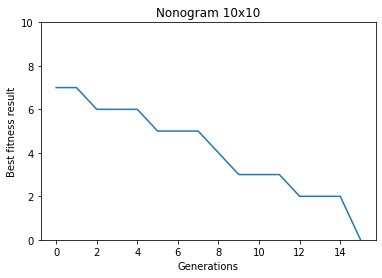

In [26]:
plt.plot(best10x10["logbook"].select("gen"), best10x10["logbook"].select("min"))

plt.xlabel('Generations') 
plt.ylabel('Best fitness result')

plt.ylim([0, 10])
    
plt.title('Nonogram 10x10') 

plt.show()

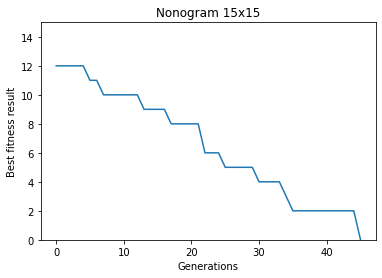

In [27]:
plt.plot(best15x15["logbook"].select("gen"), best15x15["logbook"].select("min"))

plt.xlabel('Generations') 
plt.ylabel('Best fitness result') 
    
plt.ylim([0, 15])
    
plt.title('Nonogram 15x15') 

plt.show()

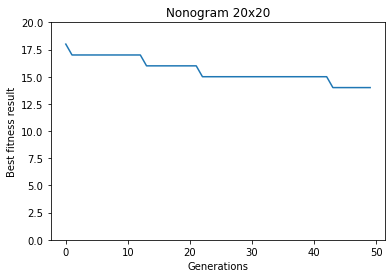

In [28]:
plt.plot(best20x20["logbook"].select("gen"), best20x20["logbook"].select("min"))

plt.xlabel('Generations') 
plt.ylabel('Best fitness result')

plt.ylim([0, 20])
    
plt.title('Nonogram 20x20') 

plt.show()

In [32]:
bf_results = []

In [34]:
start = time.time()

puzzle = Puzzle(inputs[0][0]['cols'], inputs[0][0]['rows'])

while True:
    if not puzzle.solve_step():
        end = time.time()
        print("no next solution step")
        print("\nTime: ", round(end - start, 3), "sec")
        print("\nNonogram:\n")
        puzzle.print()
        break
        
bf_results.append({
    "n": 10,
    "time": round(end - start, 3)
})

no next solution step

Time:  0.001 sec

Nonogram:

  ██████  
 ████ ███ 
█████ ████
██ ███  ██
███ █████ 
 █████    
    ███   
    ██    
 █  ██   █
██████████


In [35]:
start = time.time()

puzzle = Puzzle(inputs[1][0]['cols'], inputs[1][0]['rows'])

while True:
    if not puzzle.solve_step():
        end = time.time()
        print("no next solution step")
        print("\nTime: ", round(end - start, 3), "sec")
        print("\nNonogram:\n")
        puzzle.print()
        break
        
bf_results.append({
    "n": 15,
    "time": round(end - start, 3)
})

no next solution step

Time:  0.009 sec

Nonogram:

      ███      
      ███      
      █ █      
     ██ █      
     ███       
    ██ ███████ 
█████    ████ █
    █   ██    █
    █   ███████
      ███    ██
████ █  ██████ 
██████  █  ███ 
█████████████  
     ████████  
        ████   


In [36]:
start = time.time()

puzzle = Puzzle(inputs[2][0]['cols'], inputs[2][0]['rows'])

while True:
    if not puzzle.solve_step():
        end = time.time()
        print("no next solution step")
        print("\nTime: ", round(end - start, 3), "sec")
        print("\nNonogram:\n")
        puzzle.print()
        break
        
bf_results.append({
    "n": 20,
    "time": round(end - start, 3)
})

no next solution step

Time:  0.174 sec

Nonogram:

         ████ █████ 
        ███   █   █ 
       ███   ██   ██
      ██ █   █  ██ █
     ██  █     ███ █
    ██ █ █     █ ███
    ███  ██       ██
   ██   █ ███████ ██
   █ ████ █████ ████
   ███ █ ███     ███
   ██ ██ ██       ██
   ██ █  ██   ██ ███
    ███ ███    ███ █
     ███████ █  ██ █
 ████ ██████ ██   ██
██████    ██  █   █ 
██  ████████  █████ 
███    ████    ███  
██████              
  ███               


In [42]:
pandas.DataFrame([
    [best10x10["time"], best15x15["time"], best20x20["time"]],
    [best10x10["mut_indpb"], best15x15["mut_indpb"], best20x20["mut_indpb"]],
    ["YES", "YES", "YES"],
    [best10x10["population"], best15x15["population"], best20x20["population"]],
    ["YES", "YES", "NO"],
    [bf_results[0]["time"], bf_results[1]["time"], bf_results[2]["time"]]
], [
    "GA_TIME (s)", "GA_MUT", "GA_ELITE", "GA_POPULATION", "GA_ISSOLVED", "BF_TIME"
], [
    "10x10", "15x15", "20x20"
])

,10x10,15x15,20x20
GA_TIME (s),1.235,133.093,464.451
GA_MUT,0.5,0.3,0.1
GA_ELITE,YES,YES,YES
GA_POPULATION,500,15000,30000
GA_ISSOLVED,YES,YES,NO
BF_TIME,0.001,0.001,0.009


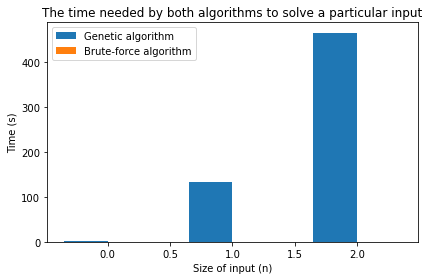

In [56]:
labels = ['10x10', '15x15', '20x20']
ga_time = [best10x10["time"], best15x15["time"], best20x20["time"]]
bf_time = [bf_results[0]["time"], bf_results[1]["time"], bf_results[2]["time"]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ga_time, width, label='Genetic algorithm')
rects2 = ax.bar(x + width/2, bf_time, width, label='Brute-force algorithm')

ax.set_xlabel('Size of input (n)')
ax.set_ylabel('Time (s)')

ax.set_title('The time needed by both algorithms to solve a particular input')

ax.legend()

fig.tight_layout()

plt.show()

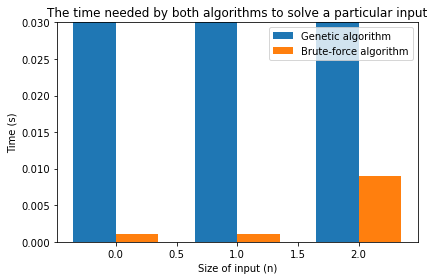

In [61]:
labels = ['10x10', '15x15', '20x20']
ga_time = [best10x10["time"], best15x15["time"], best20x20["time"]]
bf_time = [bf_results[0]["time"], bf_results[1]["time"], bf_results[2]["time"]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ga_time, width, label='Genetic algorithm')
rects2 = ax.bar(x + width/2, bf_time, width, label='Brute-force algorithm')

plt.ylim([0, 0.03])

ax.set_xlabel('Size of input (n)')
ax.set_ylabel('Time (s)')

ax.set_title('The time needed by both algorithms to solve a particular input')

ax.legend()

fig.tight_layout()

plt.show()